In [1]:
from __lib__ import *
with open('/home/dtan/Documents/GCN/GCN_Vietnam/Vietnam_invoice_data/mcocr2021_raw/label_dict.json') as label:
    dict_label = json.load(label)


In [2]:
with open('/home/dtan/Documents/GCN/GCN_Vietnam/Vietnam_invoice_data/mcocr2021_raw/mcocr_train_data/mcocr_train_df.csv') as csv_anno:
    data = pd.read_csv(csv_anno)

In [70]:
data['anno_polygons'][176]

"[{'category_id': 18, 'segmentation': [[580.3, 508.3, 582.3, 572.5, 564, 573.6, 562, 509.3]], 'area': 1182, 'bbox': [562, 508, 20, 66], 'width': 1024, 'height': 768}]"

size of w and h is added in the last of name.

a field: bbox(convert to 4 point) (x,y,w,h)| label| text

In [56]:
imag_label = ['category_id','segmentation','area','bbox','width','height']
column_data = ['bbox','label_id','label','text']
dict_label

{'15': 'SELLER', '16': 'ADDRESS', '17': 'TIMESTAMP', '18': 'TOTAL_COST'}

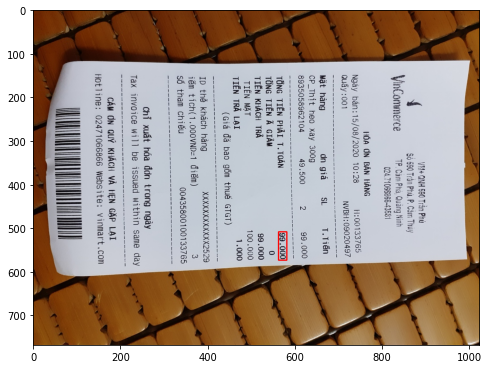

In [71]:
import cv2
img = cv2.imread("/home/dtan/Documents/GCN/GCN_Vietnam/Vietnam_invoice_data/mcocr2021_raw/mcocr_train_data/train_images/mcocr_public_145013bldqx.jpg")
cv2.rectangle(img,(562, 508, 20, 66),(0,0,255),thickness=2)
plt.figure(figsize=(8,20))
plt.imshow(img[:,:,::-1])

In [74]:
data.head(n=2)

,img_id,anno_polygons,anno_texts,anno_labels,anno_num,anno_image_quality
0,mcocr_public_145013ddcph.jpg,"[{'category_id': 15, 'segmentation': [[231.9, ...",MINIMART ANAN|||Chợ Sủi Phú Thị Gia Lâm|||Ngày...,SELLER|||ADDRESS|||TIMESTAMP|||TOTAL_COST|||TO...,5,0.635309
1,mcocr_public_145013fxcgs.jpg,"[{'category_id': 15, 'segmentation': [[311.6, ...",VinCommerce|||VM + QNH Dự án quỹ đất đường sắt...,SELLER|||ADDRESS|||ADDRESS|||ADDRESS|||TIMESTA...,7,0.774317


In [156]:
import pandas as pd
import ast

# Read the CSV file

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Extract the image ID
    image_id = row['img_id']
    
    # Extract the annotation polygons
    anno_polygons = ast.literal_eval(row['anno_polygons'])
    content = str(row['anno_texts']).split('|||')
    text_labels = str(row['anno_labels']).split('|||')
    
    image_df = pd.DataFrame(anno_polygons)
    # image_df.drop('area',axis=1)

    image_df['index'] = image_df.index
    image_df['content'] = content
    image_df['label'] = text_labels
    column_order = ['index', 'segmentation', 'bbox','category_id', 'label', 'content','area', 'width', 'height']
    image_df = image_df.reindex(columns=column_order)
    image_df.rename(columns={'category_id': 'label_id',
                             'segmentation': 'segmentation',
                             'label':'label_text',
                             'bbox': 'bbox',
                             'width': 'width',
                             'height': 'height'}, inplace=True)
    image_df = image_df.drop(["area",'segmentation'], axis=1)
    image_df['bbox'] = image_df['bbox'].apply(lambda bbox: [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]] if isinstance(bbox, list) else bbox)
    # Write the new DataFrame to a separate CSV file
    image_df.to_csv(f'/home/dtan/Documents/GCN/GCN_Vietnam/Out_label/{image_id}.csv', index=False)

image_df.head(n=2)


,index,bbox,label_id,label_text,content,width,height
0,0,"[398, 5, 565, 43]",15,SELLER,BIG C DI AN,1024,1366
1,1,"[259, 25, 681, 87]",15,SELLER,"CTY TNHH EB BINH DUONG (""EBBD"")",1024,1366
